# Artificial neural networks for QSAR
_by Phil Harrison (February 2021)_
#### Dataset
For this exercise we will use the same dataset of aqueous solubility of 1142 diverse chemical compounds as you previously explored during the QSAR lab last week. However, here we will only use the PhysChem descriptors.

#### Modelling comparisons
1. Compare the results of linear regression to those of a simple neural network with no hidden layers and no non-linear activation functions
2. Compare the results of a a random forest regressor, a support vector regressor, and a neural network with two hidden layers (with non-linear activations) and dropout.

#### Aims
* to see the link between neural networks and linear regression
* to learn the basics of how to define, compile, fit and evaluate neural networks via TensorFlow.

#### Note
We will be using the open-source machine learning framework TensorFlow (https://www.tensorflow.org) and Keras (https://keras.io) for our neural networks. TensorFlow was developed by the Google Brain team and is today one of the most widely used machine learning frameworks in research and industry and Keras was/is the most popular higher-level API that runs atop TensorFlow. However, last year TensorFlow 2 was released. In TensorFow 2 (which we will use for all our neural network work) Keras is now fully integrated. This means that we get all the benefits of TensorFlow with a much easier (Keras-type) way to define and train models than was previously possible with TensorFlow 1.

## Load packages

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, datasets

# Helper libraries
import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

print(tf.__version__)

2.1.0


## Plotting functions

In [2]:
def plot_history(model_history, model_name):
    fig = plt.figure(figsize=(15,5), facecolor='w')
    ax = fig.add_subplot(121)
    ax.plot(model_history.history['loss'])
    ax.plot(model_history.history['val_loss'])
    ax.set(title=model_name + ': Model loss', ylabel='Loss', xlabel='Epoch')
    ax.legend(['Train', 'Test'], loc='upper right')
    ax = fig.add_subplot(122)
    ax.plot(np.log(model_history.history['loss']))
    ax.plot(np.log(model_history.history['val_loss']))
    ax.set(title=model_name + ': Log model loss', ylabel='Log loss', xlabel='Epoch')
    ax.legend(['Train', 'Test'], loc='upper right')
    plt.show()
    plt.close()

## Load and preprocess data

#### Load and check shape of X and y

In [3]:
X = np.load('data/X_qsar.npy')
y = np.load('data/y_qsar.npy')
print(X.shape)
print(y.shape)

(1126, 8)
(1126,)


#### Split into training and test sets and standardize the data
Here we will just have a training and test set, so our results will not be quite as rigerous as those you got with cross-validation in the supervised machine learning lab.

In [4]:
n_train = int(len(y) * 0.7) # 70% of data for training and 30% for testing

random.seed(1234)
indices = np.arange(len(y))
random.shuffle(indices)

# X_train0 is our training data prior to standardization
X_train0, X_test0 = X[indices[:n_train]], X[indices[n_train:]]
y_train, y_test = y[indices[:n_train]], y[indices[n_train:]]

# standardize X_train0 and X_test0 to give X_train and X_test
scaler = StandardScaler().fit(X_train0)
X_train = scaler.transform(X_train0)
X_test = scaler.transform(X_test0)

## Linear Regression

In [5]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
LR_pred = LR_model.predict(X_test)
LR_mse = mean_squared_error(y_test, LR_pred)
print('Linear Regression: MSE = ' + str(np.round(LR_mse, 3)))

Linear Regression: MSE = 0.938


## Artifical neural network as a linear regression
If we define a neural network with no hidden layers and no non-linear activations we essentailly get the same results as we do with basic linear regression. The results below should help clarify that to you (there are some minor differences hovever, hence the MSE for the neural network will not be _exactly_ the same as the results above for linear regression, but they are neverthelss very close).

<p>
    <img src="figs/lin-reg.png" alt="drawing" style="width:1200px;"/>
    <center>Figure 1. Our neural network version of linear regression.</center>
</p>

#### Define and summarise the model

In [6]:
inps = layers.Input(shape=X_train[0].shape)
preds = layers.Dense(1)(inps)

ANN1 = models.Model(inputs=inps, outputs=preds)
ANN1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


#### Compile and fit the model
The learning rate and optimizer chosen below are both things that can be changed when one explores hyper parameter options, different architectures and what not. Below we use a learning rate (lr) of 0.001 (a common default learning rate) and the 'RMSprop' optimizer.

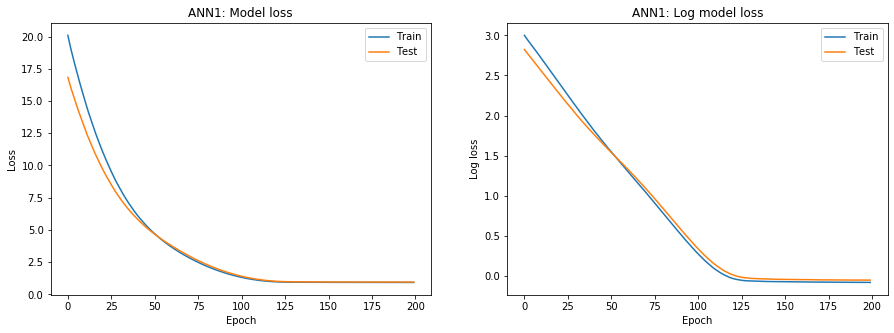

In [7]:
lr = 0.001

ANN1.compile(optimizer=optimizers.RMSprop(lr=lr), loss='mse')

history = ANN1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0)
plot_history(history, 'ANN1')

#### Evaluate the model

In [8]:
ANN1_mse = ANN1.evaluate(X_test, y_test, verbose=0)
print('ANN1: MSE = ' + str(np.round(ANN1_mse, 3)))

ANN1: MSE = 0.948


## Random Forest Regressor & Support Vector Regressor
For comparative purposes, with the results we will explore later with a more involved neural network architectures than the one above, we will build a random forest and support vector model (perhaps some of you already did this at the end of the supervised machine learning lab?). For these two machine learning algorithms we will just use the default hyper parameter settings, which are often a good place to start. This means that you will just have () after the model definition, as you did for the linear regression with LinearRegression(). To change the hyper parameters from the defaults one needs to specify them within the braces (...).

The code cells for the random forest and support vector regressors have been left blank below. You should fill in these cells. You should define the models, fit them, make predictions from them, compute their MSEs and print out the results.

* hint 1: look to the cell where we 'Load packages' to get the right model definition for the two machine learning methods
* hint 2: look at the cell where we do 'Linear Regression'. The code should be pretty darn similar to this :) 

#### Random Forest regressor

In [9]:
RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)
RF_pred = RF_model.predict(X_test)
RF_mse = mean_squared_error(y_test, RF_pred)
print('Random Forest Regressor: MSE = ' + str(np.round(RF_mse, 3)))

Random Forest Regressor: MSE = 0.469


#### Support vector Regressor

In [10]:
SV_model = SVR()
SV_model.fit(X_train, y_train)
SV_pred = SV_model.predict(X_test)
SV_mse = mean_squared_error(y_test, SV_pred)
print('Support Vector Regressor: MSE = ' + str(np.round(SV_mse, 3)))

Support Vector Regressor: MSE = 0.488


## Going deeper with ANNs 
In the cells below we define, compile, fit and evaluate a neural network model with:
* two hiiden layers, each with 32 neurons and non-linear activations (relu)
* a dropout layer at the end with a dropout rate of 0.2

<p>
    <img src="figs/relu-activation.png" alt="drawing" style="width:500px;"/>
    <center>Figure 2. relu activation.</center>
</p>

Dropout can help to avoid overfitting, much as L1 and L2 regularizations do (as you explored in the supervise machine learning lab). In the model loss plots (below) this stops the test loss from increasing as you train for more epochs.

Some quotes from a paper I co-authored called "Deep Learning in Image Cytometry: A Review" (https://onlinelibrary.wiley.com/doi/full/10.1002/cyto.a.23701):

"_Overfitting occurs when the parameters of a model fit too closely to the input training data, without capturing the underlying distribution, and thus reducing the model’s ability to generalize to other datasets_".

DROPOUT: "_A regularization technique that reduces the interdependent learning among the neurons to prevent overfitting. Some neurons are randomly “dropped,” or disconnected from other neurons, at every training iteration, removing their influence on the optimization of the other neurons. Dropout creates a sparse network composed of several networks—each trained with a subset of the neurons. This transformation into an ensemble of networks hugely decreases the possibility of overfitting, and can lead to better generalization and increased accuracy_".

<p>
    <img src="figs/dropout.png" alt="drawing" style="width:1200px;"/>
    <center>Figure 3. Dropout.</center>
</p>

In what comes below there are no missing cells or code lines for you to fill in, this is simply an example. But pay attention to how the code is written below as in the jupyter notebook 'day1_part2' there will be missing parts that you will have to fill in. The code below will help you with those later tasks.

In [11]:
inps = layers.Input(shape=X_train[0].shape)
x = layers.Dense(32, activation='relu')(inps)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.2)(x)
preds = layers.Dense(1)(x)

ANN2 = models.Model(inputs=inps, outputs=preds)
ANN2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


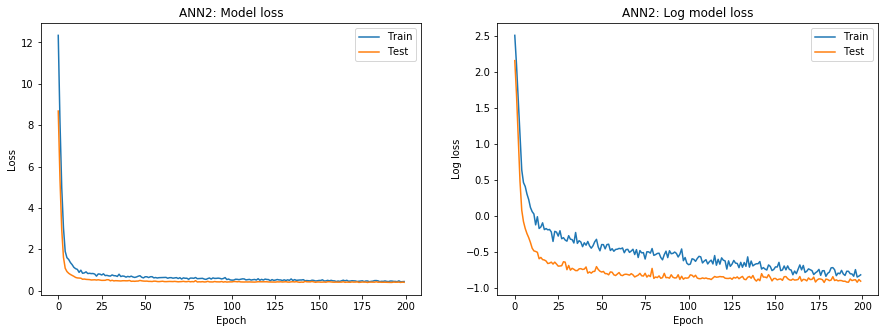

In [12]:
lr = 0.001

ANN2.compile(optimizer=optimizers.RMSprop(lr=lr), loss='mse')

history = ANN2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0)
plot_history(history, 'ANN2')

In [13]:
ANN2_mse = ANN2.evaluate(X_test, y_test, verbose=0)
print('ANN2: MSE = ' + str(np.round(ANN2_mse, 3)))

ANN2: MSE = 0.403


## So...
above you should have gotten the lowest MSE for the neural network, followed by the random forest and then the support vector regressor. These results are however not the final say. Different hyper parameter settings for any of these machine learning algorithms could change the rankings. For neural networks there are many hyper parameters that one could explore, including the network architecture, the number of layers, the number of neurons per layer, the drop out rate(s), the learning rate and the optimizer to use. In later labs this week we will explore these, and additional, choices. A full comparison would also better be done via cross validation as our results above are also affected by the train/test splitting of the data...

## P.S.
The TensorFlow webiste (https://www.tensorflow.org) is a great place to look if you're interested in exploring neural networks further.